In [1]:
from datetime import datetime
import tensorflow as tf
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
now = str(datetime.now().date())

In [2]:
# import config 
import configs.config
importlib.reload(configs.config)
from configs.config import CFG
from utils import config
config = config.Config.from_json(CFG)

## Create Dataset

In [5]:
# create Train Series and Dataset 
import dataloader.dataloader
importlib.reload(dataloader.dataloader)
from dataloader.dataloader import Train_Series,Dataset
try: 
    del series,ds
except:
    pass
from dataloader.dataloader import Test_Series
try: 
    del test_series
except:
    pass

series = Train_Series(config.data,config.paths)
series.createSeries()
test_series = Test_Series(config.data,config.paths)
test_series.createSeries()
ds = Dataset(series,test_series)
ds.split_dataset()

X_train = ds.X_train
y_train = ds.y_train
X_test = ds.X_test
y_test = ds.y_test

print(X_train.shape)
print(X_test.shape)


(77, 17280, 4)
(3, 17280, 4)


In [7]:
X_train[0,0,:]

array([0.18825099, 0.51226516, 0.11219329, 0.96234959])

In [218]:
# series_keys = list(series.series.keys())
# example = series.series[series_keys[0]].get_correct_slices()

# example
dataset = tf.data.Dataset.from_tensors(X_train)
# print(dataset)
dataset_y = tf.data.Dataset.from_tensors(y_train[:,10:,:])   
# print(dataset_y)
# Window the data but only take those with the specified size
dataset = dataset.window(10,shift=1,drop_remainder=True)
dataset_y = dataset_y.window(1,shift=1,drop_remainder=True)

# Flatten the windows by putting its contents in a single batch
dataset = dataset.flat_map(lambda window: window.batch(10))
dataset_y = dataset_y.flat_map(lambda window: window.batch(1))
# Print the results
for window in dataset:
  print(window)
# print(dataset_y)

# Create tuples with features and labels
#dataset = dataset.map(lambda window: (window, ))

## Plot Random Series Data

In [48]:
import matplotlib.pyplot as plt

In [142]:
import numpy as np
def serie_moving_average(serie,average_val=[10,5]):
    MA_serie = np.zeros(serie.shape)
    for j in range(len(average_val)):
        for i in range(average_val[j]):
            MA_serie[i,j] = np.mean(serie[:i+1,j])
            continue
        w = np.repeat(1,average_val[j])/average_val[j]
        MA_serie[average_val[j]-1:,j] = np.convolve(serie[:,j],w,'valid')    
    return MA_serie




    



(3, 17280)


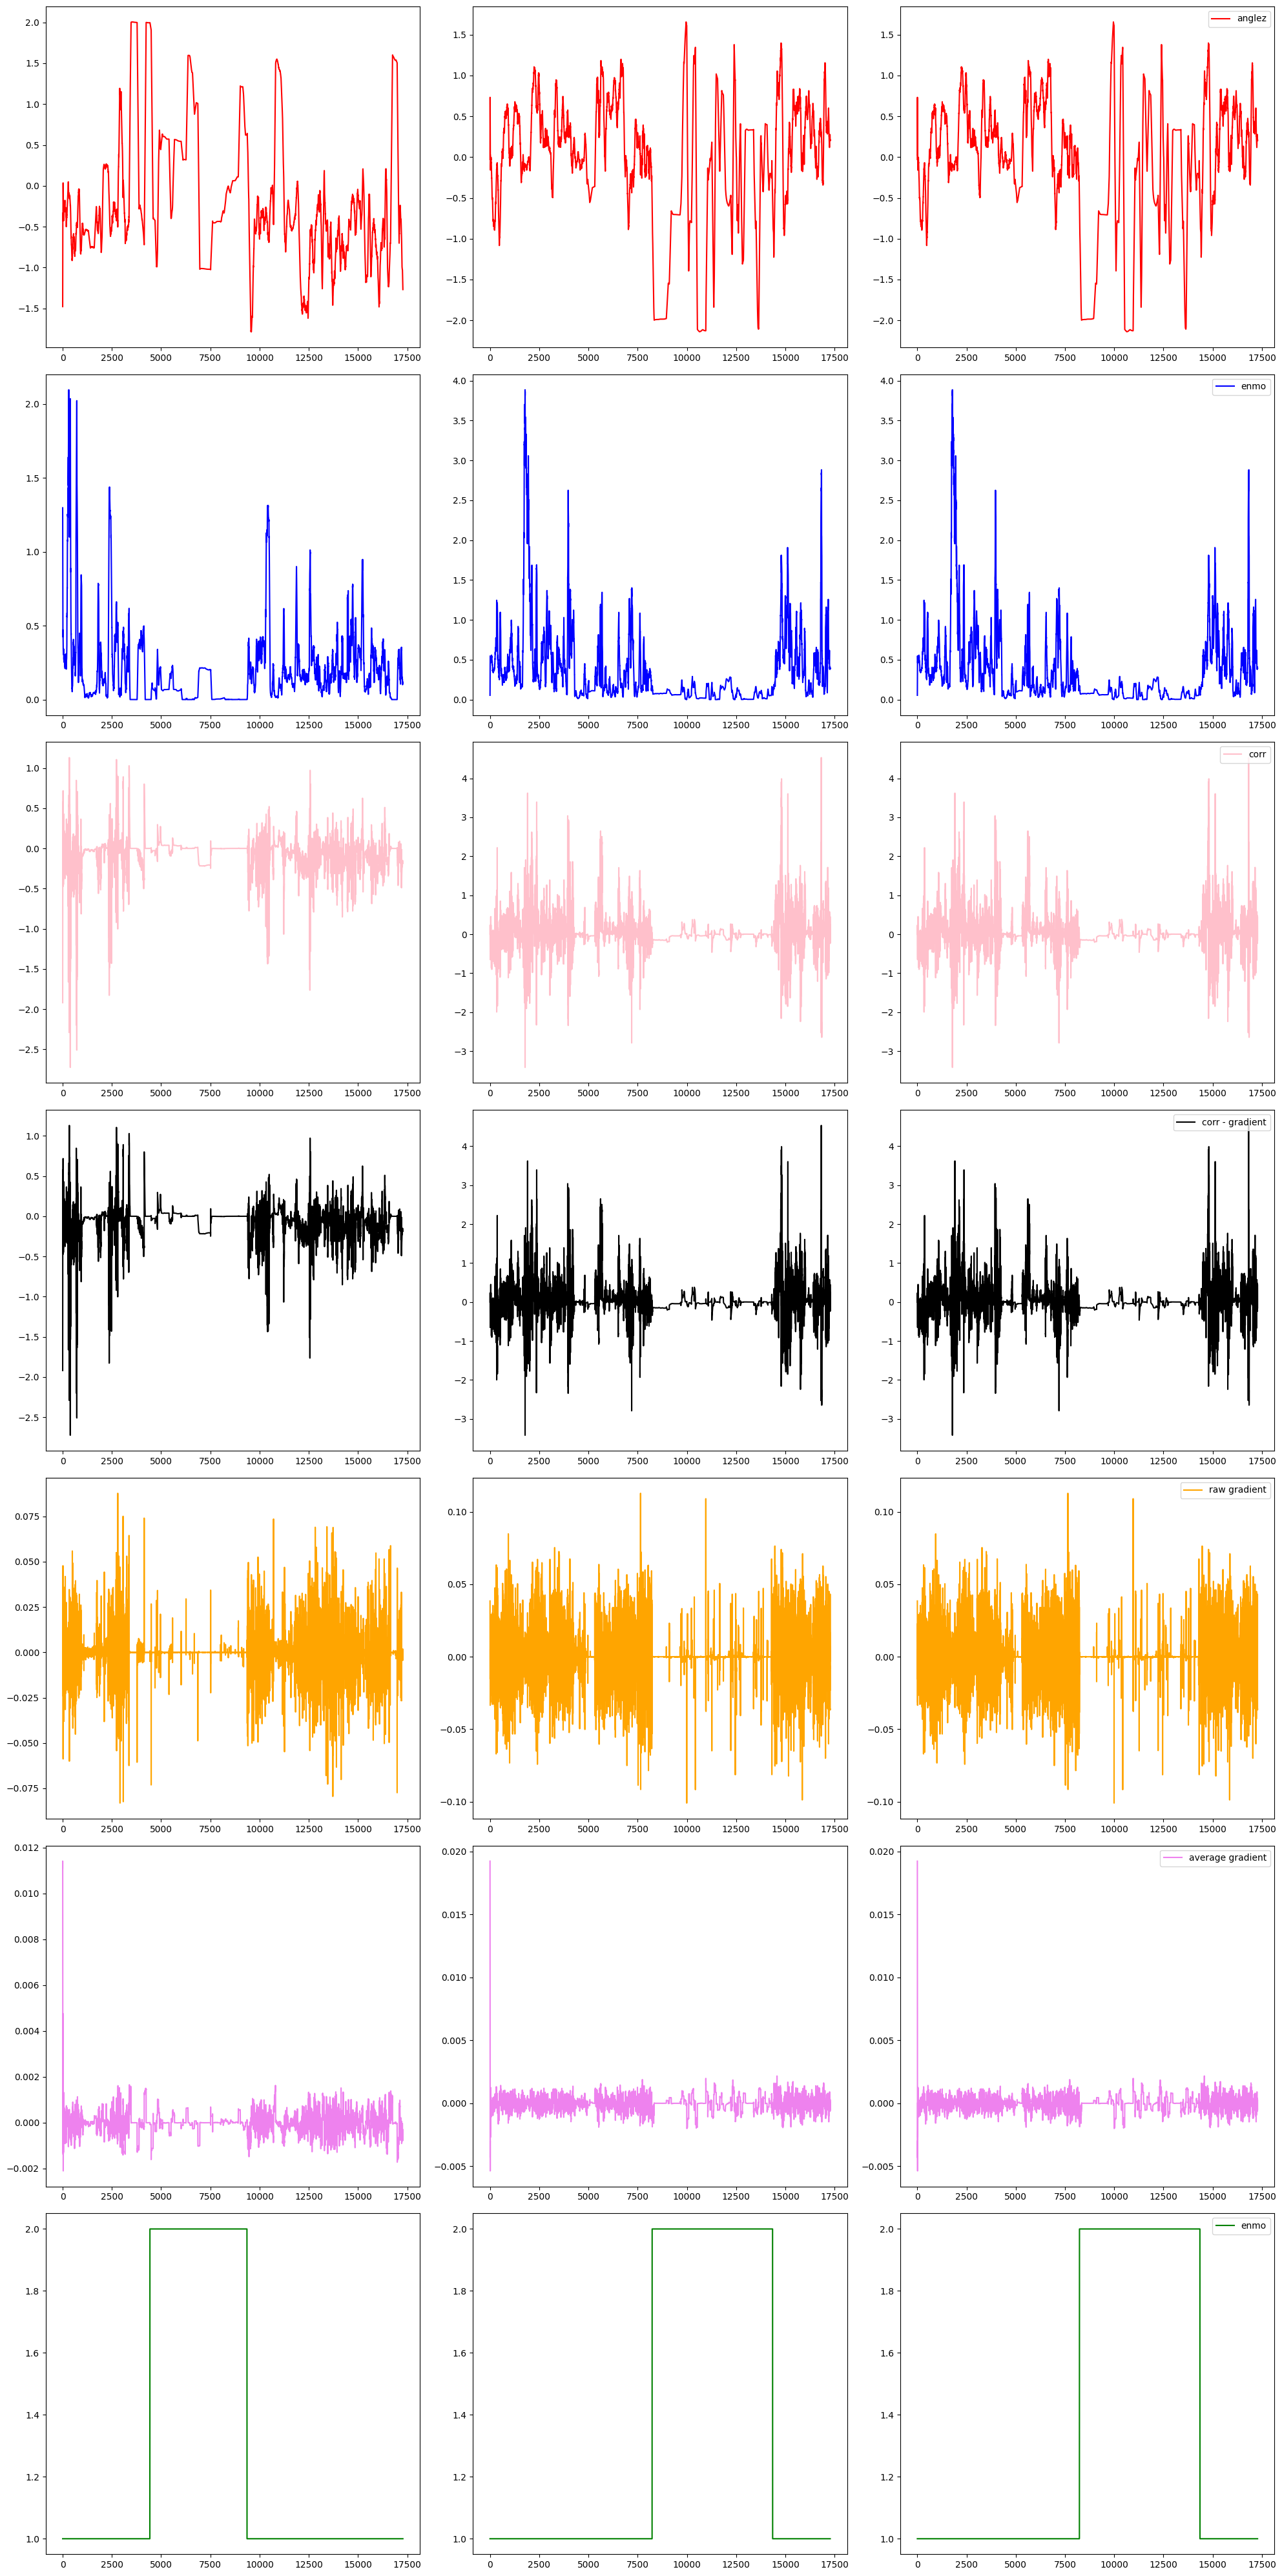

In [183]:
import matplotlib.pyplot as plt
plot_size = 3
gradient_diff = 20
selected_examples_no = np.random.randint(0,X_train.shape[0],plot_size)
selected_examples= X_train[selected_examples_no]

raw_gradient = np.gradient(selected_examples[:,:,0],gradient_diff,axis = 1)
print(raw_gradient.shape)
for i in range(selected_examples.shape[0]):
    selected_examples[i] = serie_moving_average(selected_examples[i],average_val=[1,50])
corr = selected_examples[:,:,1]*selected_examples[:,:,0]
for i in range(selected_examples.shape[0]):
    selected_examples[i] = serie_moving_average(selected_examples[i],average_val=[100,1])
av_gradient = np.gradient(selected_examples[:,:,0],gradient_diff,axis = 1)
corr_gradient = selected_examples[:,:,1]*av_gradient



ax1 =[]
ax2 =[]
fig,ax = plt.subplots(7,plot_size,figsize=(20,40))
for i in range(plot_size):
    # ax[0,i].plot(X_train[selected_examples_no[i],:,0],label = 'anglez',color='red')
    # ax[1,i].plot(X_train[selected_examples_no[i],:,1],label = 'enmo',color = 'blue')
    # ax[2,i].plot(y_train[selected_examples_no[i],:,0],label = 'enmo',color = 'green')
    ax[0,i].plot(selected_examples[i,:,0],label = 'anglez',color='red')
    ax[1,i].plot(selected_examples[i,:,1],label = 'enmo',color = 'blue')
    ax[2,i].plot(corr[i],label = 'corr',color = 'pink')
    ax[3,i].plot(corr[i],label = 'corr - gradient',color = 'black')
    ax[4,i].plot(raw_gradient[i],label = 'raw gradient',color = 'orange')
    ax[5,i].plot(av_gradient[i],label = 'average gradient',color = 'violet')
    ax[6,i].plot(y_train[selected_examples_no[i],:,0],label = 'enmo',color = 'green')


for i in range(len(ax)):
    ax[i,-1].legend(loc='upper right',fontsize ='medium')
#fig.legend(loc='upper right')

fig.fontsize='big'


plt.tight_layout()  
plt.show()




In [98]:
selected_examples

array([[[-0.16738541,  0.83040817],
        [-0.37832173,  1.2960076 ],
        [-0.41804175,  0.61723142],
        ...,
        [ 0.05475207,  0.93119885],
        [ 0.41675704,  0.60741994],
        [ 0.43868728,  0.33805016]],

       [[-0.04425517,  0.        ],
        [-0.04425517,  0.        ],
        [-0.04425517,  0.        ],
        ...,
        [-1.40043688,  0.        ],
        [-1.40043688,  0.        ],
        [-1.40043688,  0.        ]],

       [[ 0.17073905, 13.62725676],
        [ 0.30513495,  4.49009102],
        [-0.09762193,  3.74620228],
        ...,
        [ 0.53568233, 11.8683256 ],
        [ 1.17298775,  2.40202922],
        [ 1.0662207 ,  4.76748837]]])